# Uses my feature tracker to generate training data

In [1]:
import os
import deeplabcut as dlc
import pandas as pd
%load_ext autoreload
%autoreload 2
import numpy as np
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import plot_full_tracklet_covering
from DLC_for_WBFM.bin.configuration_definition import load_config
from DLC_for_WBFM.utils.feature_detection.visualize_using_dlc import training_data_from_annotations
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.preprocessing.utils_tif import PreprocessingSettings


## Get location of video and annotations

In [2]:
# Get the 3d bigtiff folder
bigtiff_folder = r'D:\More-stabilized-wbfm'
subfolder = 'test2020-10-22_16-15-20_test4-channel-0-pco_camera1'

btf_fname_red = 'test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_red = os.path.join(bigtiff_folder, subfolder, btf_fname_red)

# Annotations in the same folder as the .btf
annotations = 'clust_df_dat_bipartite-stardist.pickle'
annotations = os.path.join(bigtiff_folder, subfolder, annotations)

# Get the format for a DLC annotation
proj_folder = r'C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\DLC_Projects\wbfm_3d-Charlie-2020-11-02'

fname = os.path.join(proj_folder, annotations)

project_folder = r'D:\More-stabilized-wbfm\test2020-10-22_16-15-20_test4-channel-0-pco_camera1'
config_fname = 'config.pickle'
config_fname = os.path.join(project_folder, config_fname)

c = load_config(config_fname)

### Create DLC-style annotations

In [4]:
clust_df = pd.read_pickle(annotations)

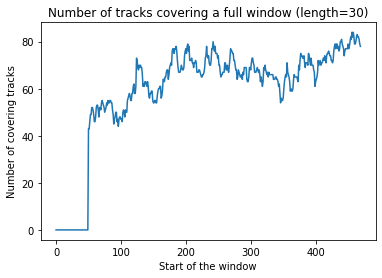

Take indices starting at 456, which has 84 tracklets of length 30


In [29]:
# Check which frames to take as annotations
%matplotlib inline
window_len = 30
x, y = plot_full_tracklet_covering(clust_df, window_len=window_len)
ind = list(y).index(max(y))
print(f"Take indices starting at {x[ind]}, which has {max(y)} tracklets of length {window_len}")

In [30]:
# Take the following frames and check number of neurons in the window
which_frames = list(range(x[ind], x[ind]+window_len+1))

In [42]:
# df_fname = 'clust_df_dat_bipartite-stardist.pickle'

# Rebuild the preprocessing object
# TODO: save this in the config file
p = PreprocessingSettings(do_mini_max_projection=True, do_rigid_alignment=True, alpha=1.0)

In [48]:
out = training_data_from_annotations(config_fname, annotations,
                                   which_frames,
                                     preprocessing_settings=p,
                                   scorer='feature_tracker',
                                   total_num_frames=500,
                                   coord_names=['z','x','y'],
                                   verbose=0)

  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

Writing tif files...


 32%|██████████████████████████                                                       | 27/84 [00:00<00:00, 258.62it/s]

31 tif files written in project C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\example-feature-workflow\feature_alignment\feature_alignment-Charlie-2021-02-19\f1-C-2021-02-19\labeled-data\test2020


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 274.67it/s]


Adding body part annotations for 84 neurons
Finished! Check the config.yaml file to make sure the bodyparts are properly written


In [49]:
#this creates a subdirectory with the frames + your labels
dlc.check_labels(c.tracking.DLC_config_fname) 

Creating images with labels by feature_tracker.
C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\example-feature-workflow\feature_alignment\feature_alignment-Charlie-2021-02-19\f1-C-2021-02-19\labeled-data\test2020_labeled  already exists!


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  6.21it/s]


If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [50]:
out

scorer                          feature_tracker                           \
bodyparts                            neuron1095               neuron1289   
coords                                        z      x      y          z   
labeled-data\test2020\img0.tif              6.0  302.0  211.0        7.0   
labeled-data\test2020\img1.tif              6.0  309.0  222.0        7.0   
labeled-data\test2020\img2.tif              6.0  313.0  221.0        7.0   
labeled-data\test2020\img3.tif              6.0  329.0  200.0        7.0   
labeled-data\test2020\img4.tif              5.0  355.0  186.0        7.0   
labeled-data\test2020\img5.tif              6.0  394.0  169.0        6.0   
labeled-data\test2020\img6.tif              6.0  425.0  171.0        7.0   
labeled-data\test2020\img7.tif              6.0  458.0  195.0        5.0   
labeled-data\test2020\img8.tif              6.0  467.0  211.0        4.0   
labeled-data\test2020\img9.tif              6.0  457.0  191.0        4.0   
labeled-data\test2020\img10.tif             5.0  433.0  173.0        5.0   
labeled-data\test2020\img11.tif             6.0  392.0  159.0        5.0   
labeled-data\test2020\img12.tif             5.0  367.0  151.0        9.0   
labeled-data\test2020\img13.tif             5.0  345.0  170.0       10.0   
labeled-data\test2020\img14.tif             6.0  321.0  187.0        9.0   
labeled-data\test2020\img15.tif             5.0  311.0  203.0        9.0   
labeled-data\test2020\img16.tif             5.0  306.0  219.0        9.0   
labeled-data\test2020\img17.tif             5.0  311.0  231.0        8.0   
labeled-data\test2020\img18.tif             5.0  312.0  212.0        8.0   
labeled-data\test2020\img19.tif             5.0  330.0  192.0        8.0   
labeled-data\test2020\img20.tif             5.0  359.0  175.0        9.0   
labeled-data\test2020\img21.tif             6.0  389.0  165.0        9.0   
labeled-data\test2020\img22.tif             6.0  423.0  167.0        9.0   
labeled-data\test2020\img23.tif             6.0  443.0  178.0       10.0   
labeled-data\test2020\img24.tif             6.0  470.0  204.0       11.0   
labeled-data\test2020\img25.tif             6.0  479.0  248.0       10.0   
labeled-data\test2020\img26.tif             6.0  470.0  272.0        7.0   
labeled-data\test2020\img27.tif             6.0  478.0  256.0        6.0   
labeled-data\test2020\img28.tif             6.0  484.0  231.0        6.0   
labeled-data\test2020\img29.tif             6.0  469.0  203.0        6.0   
labeled-data\test2020\img30.tif             5.0  439.0  183.0        6.0   

scorer                                                                  \
bodyparts                                     neuron1339                 
coords                               x      y          z      x      y   
labeled-data\test2020\img0.tif   408.0  252.0        9.0  402.0  279.0   
labeled-data\test2020\img1.tif   414.0  253.0       10.0  411.0  282.0   
labeled-data\test2020\img2.tif   417.0  251.0       10.0  413.0  278.0   
labeled-data\test2020\img3.tif   425.0  248.0       10.0  413.0  272.0   
labeled-data\test2020\img4.tif   437.0  253.0        9.0  417.0  273.0   
labeled-data\test2020\img5.tif   448.0  263.0        8.0  420.0  272.0   
labeled-data\test2020\img6.tif   436.0  283.0        8.0  409.0  281.0   
labeled-data\test2020\img7.tif   412.0  300.0        6.0  388.0  286.0   
labeled-data\test2020\img8.tif   401.0  303.0        3.0  379.0  283.0   
labeled-data\test2020\img9.tif   403.0  293.0        5.0  376.0  279.0   
labeled-data\test2020\img10.tif  405.0  283.0        5.0  374.0  280.0   
labeled-data\test2020\img11.tif  400.0  271.0        6.0  371.0  281.0   
labeled-data\test2020\img12.tif  422.0  262.0        6.0  386.0  275.0   
labeled-data\test2020\img13.tif  424.0  261.0        7.0  395.0  285.0   
labeled-data\test2020\img14.tif  425.0  257.0        8.0  398.0  284.0   
labeled-data\test2020\img15.tif  427.0  254.0        9.0  406.0  283.0   
labeled-d

## Train using 3d network

In [51]:
dlc.create_training_dataset(c.tracking.DLC_config_fname)

C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\example-feature-workflow\feature_alignment\feature_alignment-Charlie-2021-02-19\f1-C-2021-02-19\training-datasets\iteration-0\UnaugmentedDataSet_f1Feb19  already exists!
Recognized z-slice training data; using custom function
Removing 4/84 joints that are not inside the image
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([15,  7, 29, 14, 10,  0,  8, 24, 30, 17, 16, 19, 25, 26,  1, 18,  6,
          20,  2, 12,  3, 28,  9,  4, 22, 11, 27, 13, 23]),
   array([21,  5])))]

In [6]:
dlc.train_network(c.tracking.DLC_config_fname, displayiters=100, saveiters=1000)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43],
                [44],
            

Selecting single-animal trainer
Switching batchsize to 1, as default/tensorpack/deterministic loaders do not support batches >1. Use imgaug loader.
Starting with standard pose-dataset loader.
Initializing PoseNetSlices
Creating new class for use with z-slice data, PoseNetSlices
Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 100
Save_iters overwritten as 1000
Training parameter (no longer printed)
Starting training....


InvalidArgumentError: Image width 564 and height 276 should be divisible by block_size: 5
	 [[node pose/part_pred/map/while/SpaceToDepth (defined at c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py:73) ]]

Caused by op 'pose/part_pred/map/while/SpaceToDepth', defined at:
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
    return runner(coro)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\IPython\core\interactiveshell.py", line 3166, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-18be48dc3f80>", line 1, in <module>
    dlc.train_network(c.tracking.DLC_config_fname, displayiters=100, saveiters=1000)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\training.py", line 189, in train_network
    allow_growth=allow_growth,
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\train.py", line 184, in train
    losses = pose_net(cfg).train(batch)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py", line 230, in train
    heads = self.get_net(batch[Batch.inputs])
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py", line 157, in get_net
    return self.prediction_layers(net, end_points, block_size=block_size)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py", line 138, in prediction_layers
    cfg.num_joints, block_size=block_size)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py", line 36, in prediction_layer
    pred5d = expand_depth(pred4d, block_size)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py", line 74, in expand_depth
    end_points4d_ch_first)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\functional_ops.py", line 497, in map_fn
    maximum_iterations=n)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 3556, in while_loop
    return_same_structure)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 3087, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 3022, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 3525, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\functional_ops.py", line 486, in compute
    packed_fn_values = fn(packed_values)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py", line 73, in <lambda>
    end_points5d_ch_first = tf.map_fn(lambda x: tf.space_to_depth(x,block_size),
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2686, in space_to_depth
    return gen_array_ops.space_to_depth(input, block_size, data_format, name=name)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 8811, in space_to_depth
    data_format=data_format, name=name)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Image width 564 and height 276 should be divisible by block_size: 5
	 [[node pose/part_pred/map/while/SpaceToDepth (defined at c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\nnet\pose_net_slices.py:73) ]]


Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\charles.fieseler\Anaconda3\envs\DLC-dev\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\train.py", line 100, in load_and_enqueue
    batch_np = dataset.next_batch()
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\dataset\pose_defaultdataset.py", line 162, in next_batch
    return self.make_batch(data_item, scale, mirror)
  File "c:\users\charles.fieseler\documents\current_work\dlc-dev\deeplabcut\pose_estimation_tensorflow\dataset\pose_defaultdataset.py", line 261, in make_batch
    ) = compute(joint_id, scaled_joints, data_item, sm_size, scale)
  File "c:\users\charles.fieseler\documents\current_wo

# Scratch

In [83]:
cfg = dlc.auxiliaryfunctions.read_config(c.tracking.DLC_config_fname)

In [74]:
def check_frames(test_frames, which_frames=which_frames):
    test_frames_set = set(test_frames)
    local2global_ind = {}
    for f in which_frames:
        if f in test_frames_set:
            local2global_ind[test_frames.index(f)] = f
        else:
            # Must all be present
            return None
    return local2global_ind

In [75]:
sub_df = clust_df.copy()

which_neurons = sub_df['slice_ind'].apply(check_frames)

In [56]:
# Get only the covering neurons
which_neurons_dict = which_neurons.to_dict()
to_keep = [(v is not None) for k,v in which_neurons_dict.items()]
for i, val in enumerate(to_keep):
    if not val:
        del which_neurons_dict[i]
which_neurons_df = sub_df[to_keep]

In [76]:
# which_neurons_dict

In [65]:
# Get only the indices of those neurons corresponding to these frames
names = {'all_xyz':'all_xyz_old',
        'all_ind_local':'all_ind_local_old',
        'all_prob':'all_prob_old',
        'slice_ind':'slice_ind_old'}
which_neurons_and_frames_df = which_neurons_df.rename(columns=names)

def keep_subset(this_ind_dict, old_ind):
    new_ind = []
    for i in this_ind_dict:
        try:
            new_ind.append(old_ind[i])
        except:
            continue
    return new_ind

def rename_slices(this_ind_dict):
    return list(this_ind_dict.keys())

In [66]:
# All 4 fields that were renamed
f0 = lambda df : keep_subset(which_neurons_dict[df['clust_ind']], df['all_ind_local_old'])
which_neurons_and_frames_df['all_ind_local'] = which_neurons_and_frames_df.apply(f0, axis=1)

f1 = lambda df : keep_subset(which_neurons_dict[df['clust_ind']], df['all_xyz_old'])
which_neurons_and_frames_df['all_xyz'] = which_neurons_and_frames_df.apply(f1, axis=1)

f2 = lambda df : keep_subset(which_neurons_dict[df['clust_ind']], df['all_prob_old'])
which_neurons_and_frames_df['all_prob'] = which_neurons_and_frames_df.apply(f2, axis=1)

# Final one is slightly different
f3 = lambda df : rename_slices(which_neurons_dict[df['clust_ind']])
which_neurons_and_frames_df['slice_ind'] = which_neurons_and_frames_df.apply(f3, axis=1)